In [6]:
import cv2
import pandas as pd
from PIL import Image
import numpy as np

In [7]:
full_labels = pd.read_csv('../data/train.csv')

In [8]:
full_labels.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,Image__2018-01-10__13-51-22.jpg,640,480,fallen,215,191,630,477
1,Image__2018-01-10__13-51-22.jpg,640,480,standing,61,2,266,172
2,Image__2018-01-10__14-38-33.jpg,640,480,standing,13,206,215,332
3,Image__2018-01-10__14-38-33.jpg,640,480,standing,19,1,201,161
4,Image__2018-01-10__14-38-33.jpg,640,480,standing,231,11,393,145


In [19]:
GREEN = [0, 255, 0]
ORANGE = [255, 140, 0]
RED = [255, 0, 0]

# Pad image with a 1px white and (BY-1)px black border
def pad(image, by):
    if by <= 0:
        return image
    image_border1 = np.pad(
        image, ((1, 1), (1, 1), (0, 0)),
        mode="constant", constant_values=255
    )
    image_border2 = np.pad(
        image_border1, ((by-1, by-1), (by-1, by-1), (0, 0)),
        mode="constant", constant_values=0
    )

    return image_border2

def get_boxes(image_name):
    boxes = []
    selected_value = full_labels[full_labels.filename == image_name]
    for index, row in selected_value.iterrows():
        boxes.append(
            ia.BoundingBox(row['xmin'], row['ymin'], row['xmax'], row['ymax'])
        )
    return boxes

def draw_boxes(image_name):
    selected_value = full_labels[full_labels.filename == image_name]
    img = cv2.imread('../dataset/train/images/{}'.format(image_name))
    for index, row in selected_value.iterrows():
        img = cv2.rectangle(img, (row['xmin'], row['ymin']), (row['xmax'], row['ymax']), (0, 255, 0), 3)
    return img

def get_bbs(image, bbs, border=5):
    image_border = pad(image, border)
    for bb in bbs.bounding_boxes:        
        bb_shifted = bb.shift(left=border, top=border)

        print("bb: ", bb.x1, bb.y1, bb.x2, bb.y2)
        print("shifted bb: ", bb_shifted.x1, bb_shifted.y1, bb_shifted.x2, bb_shifted.y2)
        
        image_border = bb.shift(left=border, top=border).draw_on_image(image_border, thickness=2, color=color)

        
def draw_bbs(image, bbs, border=5):
    image_border = pad(image, border)
    for bb in bbs.bounding_boxes:        
        bb_shifted = bb.shift(left=border, top=border)
        image_border = bb.shift(left=border, top=border).draw_on_image(image_border, thickness=2, color=GREEN)

    return image_border

Read image and its bounding boxes

In [20]:
import imgaug as ia
from imgaug import augmenters as iaa

ia.seed(1)

img = cv2.imread('../dataset/train/images/Image__2018-01-10__13-32-01.jpg')
boxes = get_boxes('Image__2018-01-10__13-32-01.jpg')

bbs = ia.BoundingBoxesOnImage(boxes, shape=img.shape)
    
seq = iaa.Sequential([
    iaa.Affine(rotate=90), 
    iaa.Affine(scale=(0.5, 1.5)),
    iaa.MedianBlur(k=(1, 5))
])
seq_det = seq.to_deterministic()

img_aug = seq_det.augment_images([img])[0]
bbs_aug = seq_det.augment_bounding_boxes([bbs])[0]

image_before = draw_bbs(img, bbs)
image_after = draw_bbs(img_aug, bbs_aug)
image_cropped = draw_bbs(img_aug, bbs_aug.remove_out_of_image().cut_out_of_image())

Apply rotations

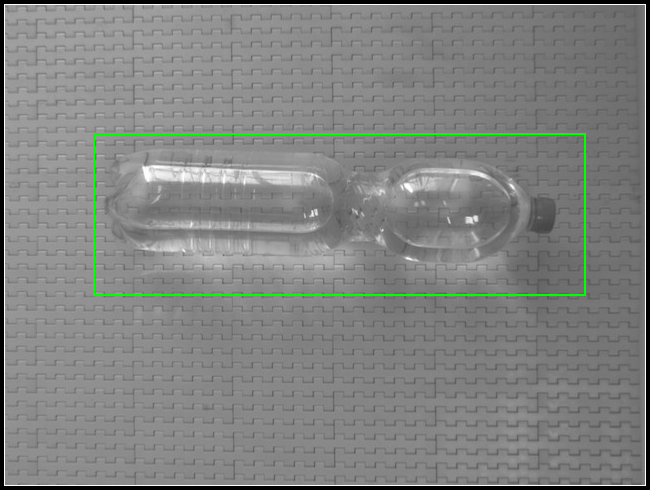

In [21]:
Image.fromarray(image_before)

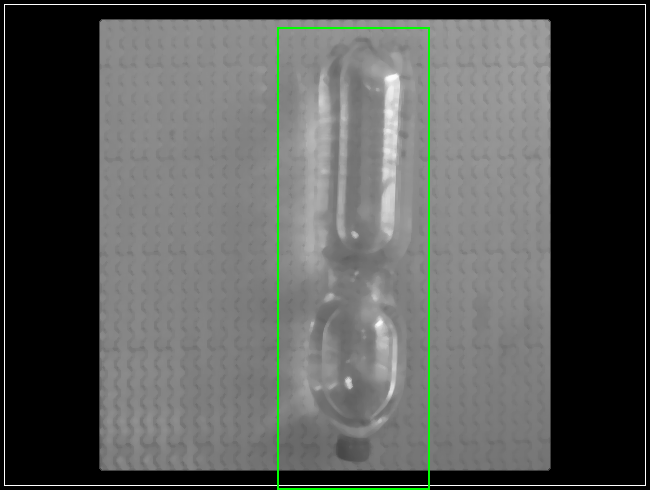

In [22]:
Image.fromarray(image_after)

(490, 650, 3)
(490, 650, 3)


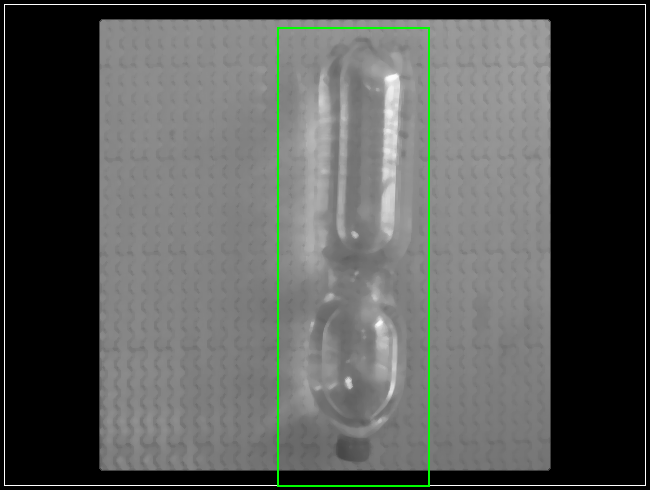

In [23]:
print(image_before.shape)
print(image_cropped.shape)
Image.fromarray(image_cropped)